In [ ]:
# Importing the required libraries
import keras
import numpy as np
from keras.models import Sequential,Model
from keras.layers import Dense,Bidirectional
from nltk.tokenize import word_tokenize,sent_tokenize
from keras.layers import *
from sklearn.model_selection import cross_val_score
import nltk
import pandas as pd
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv('/content/ISEAR_Clean(1).csv')
df1.head()

,Emotion,Statement
0,joy,On days when I feel close to my partner and ot...
1,fear,Every time I imagine that someone I love or I ...
2,anger,When I had been obviously unjustly treated and...
3,sadness,When I think about the short time that we live...
4,disgust,At a gathering I found myself involuntarily si...


In [ ]:
feel_arr=df1['Statement']
feel_arr[0]

'On days when I feel close to my partner and other friends.   \nWhen I feel at peace with myself and also experience a close  \ncontact with people whom I regard greatly.'

In [ ]:
feel_arr=[word_tokenize(sent) for sent in feel_arr]
print(feel_arr[0])

['On', 'days', 'when', 'I', 'feel', 'close', 'to', 'my', 'partner', 'and', 'other', 'friends', '.', 'When', 'I', 'feel', 'at', 'peace', 'with', 'myself', 'and', 'also', 'experience', 'a', 'close', 'contact', 'with', 'people', 'whom', 'I', 'regard', 'greatly', '.']


In [ ]:
# Defined a function padd in which each sentence length is fixed to 100.
# If length is less than 100 , then the word- '<padd>' is append
def padd(arr):
    for i in range(100-len(arr)):
        arr.append('<pad>')
    return arr[:100]

# call the padd function for each sentence in feel_arr
for i in range(len(feel_arr)):
  feel_arr[i]=padd(feel_arr[i])

In [ ]:
print(feel_arr[0])

['On', 'days', 'when', 'I', 'feel', 'close', 'to', 'my', 'partner', 'and', 'other', 'friends', '.', 'When', 'I', 'feel', 'at', 'peace', 'with', 'myself', 'and', 'also', 'experience', 'a', 'close', 'contact', 'with', 'people', 'whom', 'I', 'regard', 'greatly', '.', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']


In [ ]:
vocab_f ='/content/drive/MyDrive/glove/glove.6B.50d.txt'

In [ ]:
embeddings_index = {}
with open(vocab_f,encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

In [ ]:
embedded_feel_arr=[]
for each_sentence in feel_arr:
    embedded_feel_arr.append([])
    for word in each_sentence:
        if word.lower() in embeddings_index:
            embedded_feel_arr[-1].append(embeddings_index[word.lower()])
        else:
            embedded_feel_arr[-1].append([0]*50)


In [ ]:
print(embedded_feel_arr[0][0])

[ 0.30045    0.25006   -0.16692    0.1923     0.026921  -0.079486
 -0.91383   -0.1974    -0.053413  -0.40846   -0.26844   -0.28212
 -0.5        0.1221     0.3903     0.17797   -0.4429    -0.40478
 -0.9505    -0.16897    0.77793    0.33525    0.3346    -0.1754
 -0.12017   -1.7861     0.29241    0.55933    0.029982  -0.32417
  3.9297     0.1088    -0.57335   -0.17842    0.0041748 -0.16309
  0.45077   -0.16123   -0.17311   -0.087889  -0.089032   0.062001
 -0.19946   -0.38863   -0.18232    0.060751   0.098603  -0.07131
  0.23052   -0.51939  ]


In [ ]:
embeddings_index['joy']

array([-0.18373  ,  0.85011  , -0.61828  , -0.18052  ,  0.92443  ,
        0.28175  , -0.027129 ,  0.54799  ,  0.22811  ,  0.73123  ,
        0.13143  ,  0.15418  , -0.39835  , -1.1685   ,  0.46155  ,
       -0.27394  ,  0.0091051,  0.31601  , -0.36638  , -0.7327   ,
       -0.10399  ,  1.5338   ,  0.092924 , -0.26663  ,  1.4826   ,
       -0.45344  , -1.0312   ,  0.22284  ,  0.58048  , -0.17074  ,
        1.4035   ,  1.1406   ,  0.13008  ,  0.030103 , -0.69139  ,
       -0.39552  ,  0.048956 , -0.60783  ,  0.6644   ,  0.099907 ,
        0.61894  ,  0.15126  , -1.2345   , -0.6712   ,  0.19127  ,
        0.53935  , -0.24157  , -0.81487  , -0.46671  , -0.07133  ],
      dtype=float32)

In [ ]:
X=np.array(embedded_feel_arr)
print(np.shape(X))

(7447, 100, 50)


In [ ]:
# Perform one-hot encoding on df[0] i.e emotion
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
Y = enc.fit_transform(np.array(df1['Emotion']).reshape(-1,1)).toarray()

# Split into train and test
from keras.layers import Embedding
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Defining the BiLSTM Model
def model(X,Y,input_size1,input_size2,output_size):
  m=Sequential()
  m.add(Bidirectional(LSTM(100,input_shape=(input_size1,input_size2))))
  m.add(Dropout(0.5))
  m.add(Dense(output_size,activation='softmax'))
  m.compile('Adam','categorical_crossentropy',['accuracy'])
  m.fit(X,Y,epochs=2, batch_size=128)
  return m


Epoch 1/2
47/47 [==============================] - 35s 480ms/step - loss: 1.9054 - accuracy: 0.2095
Epoch 2/2
47/47 [==============================] - 25s 529ms/step - loss: 1.7449 - accuracy: 0.3265


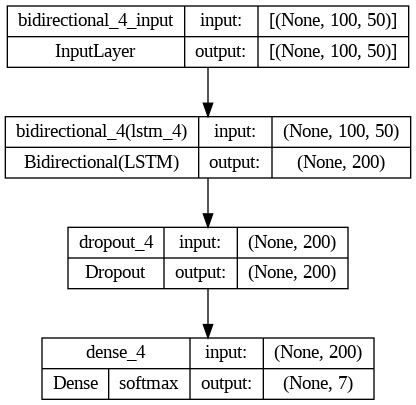

In [ ]:
tf.keras.utils.plot_model(
model(X_train,Y_train,100,50,7),
to_file="Bi_directional.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:

# Training the model
bilstmModel=model(X_train,Y_train,100,50,7)

Epoch 1/32
47/47 [==============================] - 31s 532ms/step - loss: 1.9193 - accuracy: 0.2046
Epoch 2/32
47/47 [==============================] - 25s 526ms/step - loss: 1.7604 - accuracy: 0.3190
Epoch 3/32
47/47 [==============================] - 23s 474ms/step - loss: 1.6420 - accuracy: 0.3727
Epoch 4/32
47/47 [==============================] - 24s 514ms/step - loss: 1.5718 - accuracy: 0.3980
Epoch 5/32
47/47 [==============================] - 22s 460ms/step - loss: 1.5406 - accuracy: 0.4224
Epoch 6/32
47/47 [==============================] - 24s 515ms/step - loss: 1.4930 - accuracy: 0.4381
Epoch 7/32
47/47 [==============================] - 22s 461ms/step - loss: 1.4659 - accuracy: 0.4529
Epoch 8/32
47/47 [==============================] - 24s 516ms/step - loss: 1.4187 - accuracy: 0.4717
Epoch 9/32
47/47 [==============================] - 22s 461ms/step - loss: 1.4056 - accuracy: 0.4845
Epoch 10/32
47/47 [==============================] - 24s 513ms/step - loss: 1.3586 - accura

KeyboardInterrupt: ignored

In [ ]:
tf.keras.utils.plot_model(
bilstmModel,
to_file="Bi_directional.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
#Testing the model
bilstmModel.evaluate(X_test,Y_test)